# Cvičenie 6: Pochopenie a príprava dát

👉 **Cieľom tohto cvičenia je:**
- pracovať s reálnym datasetom **El Niño**,  
- precvičiť si načítanie dát, čistenie, transformácie a prípravu dát,  
- aplikovať techniky normalizácie, diskretizácie a tvorba nových atribútov.  

Výsledkom bude niekoľko verzií datasetu (`elnino`, `elnino_1`, `elnino_2`) pripravených na ďalšiu analýzu.  

---
## Úloha 1: Získanie dát o El Niño
- Dáta El Niño si môžeš stiahnuť buď:  
  - z [Kaggle odkazu](https://www.kaggle.com/datasets/uciml/el-nino-dataset?resource=download),  
  - alebo ich nájdeš priložené v Moodly.  
- Súbor ulož do svojho pracovného adresára a načítaj ho do premennej `elnino`.  
- Preštuduj si popis atribútov a zoznám sa s datasetom
 
>💡 *Tip:* po načítaní dát použi `elnino.head()` na kontrolu prvých riadkov 


In [95]:
#TVOJ KOD 
import pandas as pd
import numpy as np


df = pd.read_csv('elnino.csv')
df.replace('.', np.nan, inplace=True)


print(elnino.head(10))


   Observation  Year  Month  Day                          Date  Latitude  \
0            1    80      3    7 1970-01-01 00:00:00.000800307     -0.02   
1            2    80      3    8 1970-01-01 00:00:00.000800308     -0.02   
2            3    80      3    9 1970-01-01 00:00:00.000800309     -0.02   
3            4    80      3   10 1970-01-01 00:00:00.000800310     -0.02   
4            5    80      3   11 1970-01-01 00:00:00.000800311     -0.02   
5            6    80      3   12 1970-01-01 00:00:00.000800312     -0.02   
6            7    80      3   13 1970-01-01 00:00:00.000800313     -0.02   
7            8    80      3   14 1970-01-01 00:00:00.000800314     -0.02   
8            9    80      3   15 1970-01-01 00:00:00.000800315     -0.02   
9           10    80      3   16 1970-01-01 00:00:00.000800316     -0.02   

   Longitude Zonal Winds Meridional Winds Humidity Air Temp Sea Surface Temp  
0    -109.46        -6.8              0.7        .    26.14            26.24  
1    

---
## Úloha 2: Pochopenie dát a atribútov

**Úlohy:**
- Na základe informácií, ktoré si získal preštudovaním datasetu, doplň alebo oprav názvy stĺpcov v datasete `elnino`.  
- Skontroluj informácie o dátach a atribútoch.
- Podľa potreby uprav dátové typy atribútov (napr. dátum → datetime, číselné atribúty → float/int), aby bolo možné s nimi správne pracovať.  


>💡 *Tipy a poznámky:*  
> - Malá pomôcka: všetky stĺpce majú v názve **nezvyčajnú medzeru na začiatku** – ber to do úvahy pri volaní `elnino[' Zonal Winds']` a podobne.  
> - Pri kontrole chýbajúcich hodnôt si všimni, že samotné `elnino.isna().sum()` ti môže dať 0, aj keď v dátach sú záznamy, ktoré nemajú žiadnu pridanú hodnotu a môžeme ich označiť ako chýbajúce hodnoty. Nájdi ich, nahraď ich za skutočné chýbajúce hodnoty (np.nan) a potom si vypíš reálny počet chýbajúcich hodnôt.  


In [104]:
df.columns = df.columns.str.strip()

print(df.dtypes)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Zonal Winds'] = pd.to_numeric(df['Zonal Winds'], errors='coerce')
df['Meridional Winds'] = pd.to_numeric(df['Zonal Winds'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Zonal Winds'], errors='coerce')
df['Air Temp'] = pd.to_numeric(df['Zonal Winds'], errors='coerce')
df['Sea Surface Temp'] = pd.to_numeric(df['Zonal Winds'], errors='coerce')


print(elnino.head())
missing_values = df['Zonal Winds'].isna().sum()
missing_values = df.isna().sum()

print(missing_values)



Observation                  int64
Year                         int64
Month                        int64
Day                          int64
Date                datetime64[ns]
Latitude                   float64
Longitude                  float64
Zonal Winds                float64
Meridional Winds           float64
Humidity                   float64
Air Temp                   float64
Sea Surface Temp           float64
dtype: object
   Observation  Year  Month  Day                          Date  Latitude  \
0            1    80      3    7 1970-01-01 00:00:00.000800307     -0.02   
1            2    80      3    8 1970-01-01 00:00:00.000800308     -0.02   
2            3    80      3    9 1970-01-01 00:00:00.000800309     -0.02   
3            4    80      3   10 1970-01-01 00:00:00.000800310     -0.02   
4            5    80      3   11 1970-01-01 00:00:00.000800311     -0.02   

   Longitude Zonal Winds Meridional Winds Humidity Air Temp Sea Surface Temp  
0    -109.46        -6.8      

---
## Úloha 3: Grafické vizualizácie dát

### Barplot
**Úlohy:**
- Vypíš početnosť záznamov pre jednotlivé hodnoty atribútu **Month**.  
- Zobraz tieto početnosti pomocou **barplotu**.  

> 💡 *Poznámky:*  
> - **Barplot (stĺpcový graf)** vizualizuje frekvenciu alebo početnosť jednotlivých kategórií.  
> - Na osi x budú mesiace (`Month`), na osi y počet záznamov.  
> - Je užitočný na porovnávanie kategórií, vizualizáciu distribúcií a zisťovanie trendov alebo odľahlých hodnôt.  


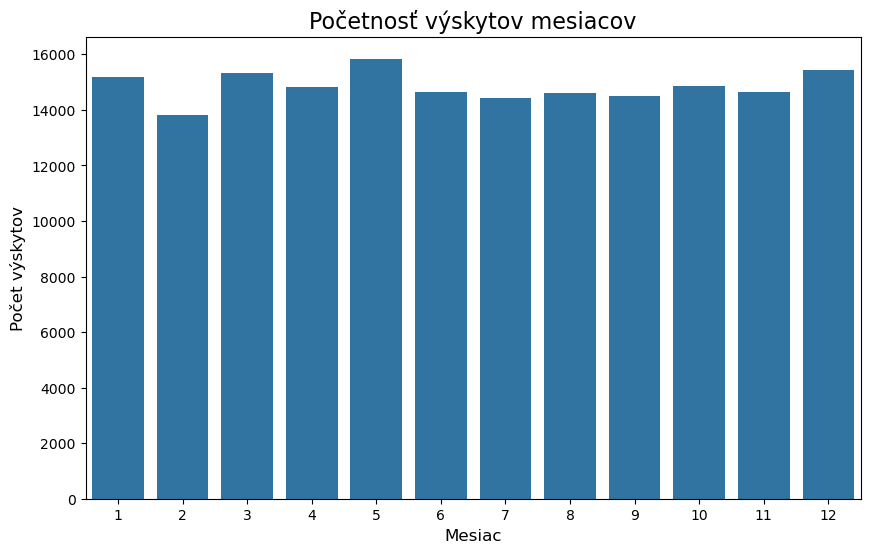

In [105]:
#TVOJ KOD 
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))  
sns.countplot(x='Month', data=df)
plt.title('Početnosť výskytov mesiacov', fontsize=16)
plt.xlabel('Mesiac', fontsize=12)
plt.ylabel('Počet výskytov', fontsize=12)

plt.show()

### Boxplot
**Úlohy:**  
- Zobraz rozdelenie hodnôt atribútu **Air Temp** pomocou boxplotu **bez odľahlých hodnôt**. 
- Zobraz rozdelenie hodnôt atribútu **Air Temp** pomocou **boxplotu** aj s odľahlými hodnotami.  
 

> 💡 *Poznámky:*  
> - **Boxplot (krabicový graf)** dokáže relatívne rýchlo a efektívne zobraziť štatistické sumarizácie číselných dát. Zobrazuje:  
>   - minimum, maximum, medián  
>   - prvý a tretí kvartil  
> - Pomáha identifikovať **odľahlé hodnoty (outliery)**.  
> - Viac o tomto grafe si môžete pozrieť aj tu:  
> [Boxplot WhiskerPlot (Min, Max, Median, Quartile1, Quartile2, Quartile3) Full tutorial](https://www.youtube.com/watch?v=ScuEYr6hLjc)


### Boxplot
**Úlohy:**  
- Zobraz rozdelenie hodnôt atribútu **Air Temp** pomocou boxplotu **bez odľahlých hodnôt**. 
- Zobraz rozdelenie hodnôt atribútu **Air Temp** pomocou **boxplotu** aj s odľahlými hodnotami.  
 

> 💡 *Poznámky:*  
> - **Boxplot (krabicový graf)** dokáže relatívne rýchlo a efektívne zobraziť štatistické sumarizácie číselných dát. Zobrazuje:  
>   - minimum, maximum, medián  
>   - prvý a tretí kvartil  
> - Pomáha identifikovať **odľahlé hodnoty (outliery)**.  
> - Viac o tomto grafe si môžete pozrieť aj tu:  
> [Boxplot WhiskerPlot (Min, Max, Median, Quartile1, Quartile2, Quartile3) Full tutorial](https://www.youtube.com/watch?v=ScuEYr6hLjc)


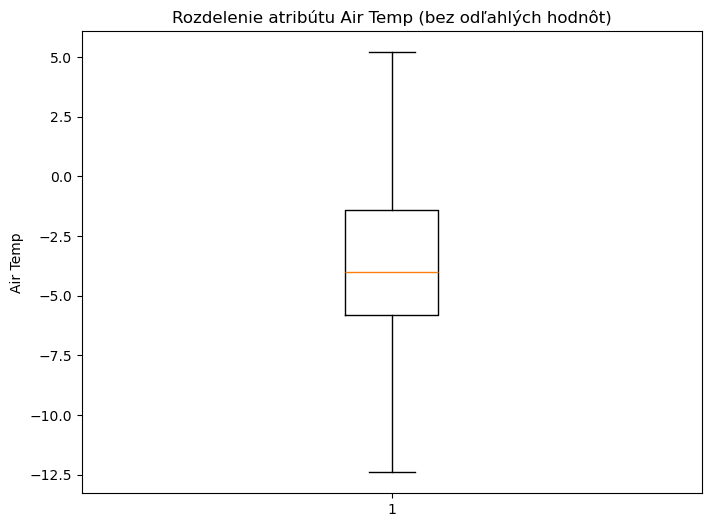

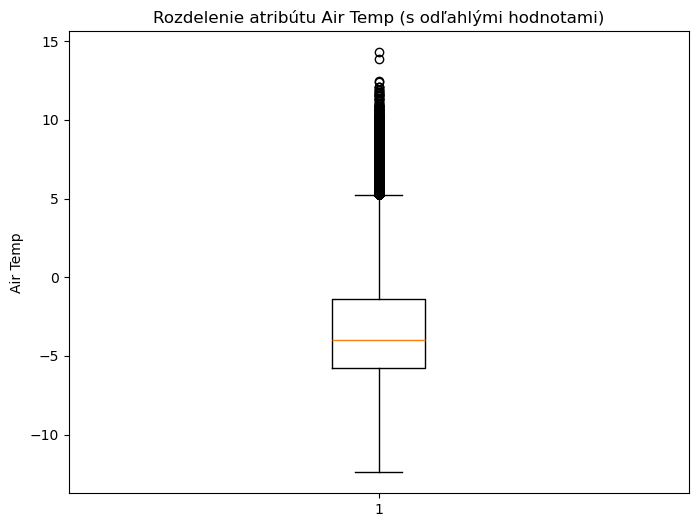

In [106]:
import matplotlib.pyplot as plt

# Boxplot bez odľahlých hodnôt (vertical by default with y-axis assignment)
plt.figure(figsize=(8, 6))
plt.boxplot(df['Air Temp'].dropna(), showfliers=False)
plt.title('Rozdelenie atribútu Air Temp (bez odľahlých hodnôt)')
plt.ylabel('Air Temp')
plt.show() # Display the plot

# Boxplot s odľahlými hodnotami (vertical by default with y-axis assignment)
plt.figure(figsize=(8, 6))
plt.boxplot(df['Air Temp'].dropna())
plt.title('Rozdelenie atribútu Air Temp (s odľahlými hodnotami)')
plt.ylabel('Air Temp')
plt.show() # Display the plot

### Histogram
**Úlohy:**
- Zobraz rozdelenie hodnôt atribútu **Sea Surface Temp** pomocou **histogramu**.  

> 💡 *Poznámky:*  
> - **Histogram** je graf, ktorý zobrazuje, ako sú hodnoty numerického atribútu rozložené do intervalov (tzv. binov).
> - Výhody použitia histogramu v exploratívnej analýze:
>   - Identifikácia tvaru rozdelenia – napr. normálne rozdelenie
>   - Zistenie odľahlých hodnôt – extrémne hodnoty, ktoré môžu ovplyvniť analýzu.
>   - Porozumenie rozsahu a hustote dát – kde sa koncentruje väčšina hodnôt.
> - Príklad: Ak máme atribút vek pacientov, histogram nám ukáže, koľko pacientov spadá do vekových skupín (napr. 0–10 rokov, 11–20 rokov, …).



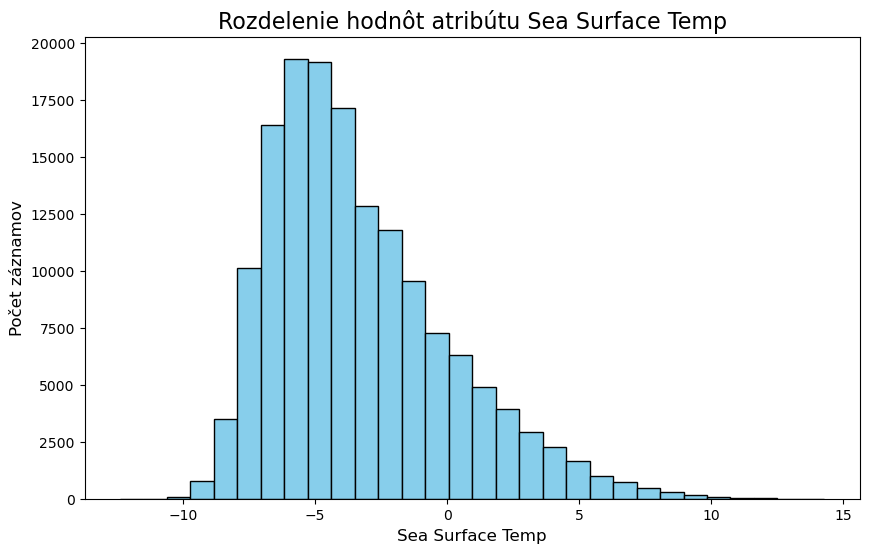

In [107]:
import matplotlib.pyplot as plt

# Predpokladáme, že máte DataFrame 'df' a atribút 'Sea Surface Temp'
plt.figure(figsize=(10, 6))

# Vytvorenie histogramu pre atribút 'Sea Surface Temp'
plt.hist(df['Sea Surface Temp'], bins=30, color='skyblue', edgecolor='black')

# Titulky a popisky
plt.title('Rozdelenie hodnôt atribútu Sea Surface Temp', fontsize=16)
plt.xlabel('Sea Surface Temp', fontsize=12)
plt.ylabel('Počet záznamov', fontsize=12)

# Zobrazenie grafu
plt.show()


---
## Úloha 4: Vytvorenie a úprava dátového rámca

**Úlohy:**

- Vytvor nový data frame s názvom **elnino_2**, ktorý bude obsahovať skopírované dáta **elnino**.  

- V **elnino_2** doplň chýbajúce hodnoty atribútov **Zonal Winds** a  **Meridional Winds** tak, že ich nahradíš **priemerom (mean)** daného stĺpca. 
- Doplň chýbajúce hodnoty atribútov **Humidity** (relatívna vlhkosť) a **Air Temp** (teplota vzduchu) tak, že ich nahradíš **mediánom (median)** daného stĺpca.    

- Vymaž atribút **Sea Surface Temp** (teplota hladiny mora) z dataframe **elnino_2**.  

- Nakoniec vypíš súhrn informácií o dátach, aby ste videl, ktoré hodnoty sú stále dostupné a či sa doplnili chýbajúce údaje.  

> 💡 *Pomôcky:*  
> - Priemer získate pomocou `mean()`, medián pomocou `median()`.  
> - Na kontrolu dát využite `info()` alebo `head()`.


In [108]:
#TVOJ KOD 
# Vytvorenie kópie DataFrame 'elnino' do 'elnino_2'
elnino_2 = df.copy()

elnino_2['Zonal Winds'] = elnino_2['Zonal Winds'].fillna(elnino_2['Zonal Winds'].mean())
elnino_2['Meridional Winds'] = elnino_2['Meridional Winds'].fillna(elnino_2['Meridional Winds'].mean())


elnino_2['Humidity'] = elnino_2['Humidity'].fillna(elnino_2['Humidity'].median())
elnino_2['Air Temp'] = elnino_2['Air Temp'].fillna(elnino_2['Air Temp'].median())


elnino_2.drop(columns=['Sea Surface Temp'], inplace=True)
# Vypísanie súhrnu informácií o dátach
print(elnino_2.info())
print(elnino_2.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Observation       178080 non-null  int64         
 1   Year              178080 non-null  int64         
 2   Month             178080 non-null  int64         
 3   Day               178080 non-null  int64         
 4   Date              178080 non-null  datetime64[ns]
 5   Latitude          178080 non-null  float64       
 6   Longitude         178080 non-null  float64       
 7   Zonal Winds       178080 non-null  float64       
 8   Meridional Winds  178080 non-null  float64       
 9   Humidity          178080 non-null  float64       
 10  Air Temp          178080 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 14.9 MB
None
   Observation  Year  Month  Day                          Date  Latitude  \
0            1    80   

---
**Úlohy:**
- Vytvor nový dataframe s názvom **elnino_1**, ktorý bude obsahovať dáta **elnino** očistené od všetkých chýbajúcich hodnôt.  

- Vykresli **scatterplot matrix (maticu bodových grafov)** pre vybrané numerické atribúty:  **Zonal Winds**, **Meridional Winds**, **Sea Surface Temp** a **Air Temp**.


> 💡 *Poznámky:*  
> - **Scatterplot (bodový graf)** zobrazuje vzťah medzi dvoma numerickými atribútmi pomocou bodov.  
> - Každý bod predstavuje jeden záznam v dátach s hodnotami dvoch atribútov ako súradnice.  
> - **Scatterplot matrix** je mriežka takýchto grafov pre všetky páry numerických atribútov, čo umožňuje rýchlo identifikovať korelácie, vzory alebo extrémne hodnoty medzi atribútmi.  



Index(['Observation', 'Year', 'Month', 'Day', 'Date', 'Latitude', 'Longitude',
       'Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp',
       'Sea Surface Temp'],
      dtype='object')


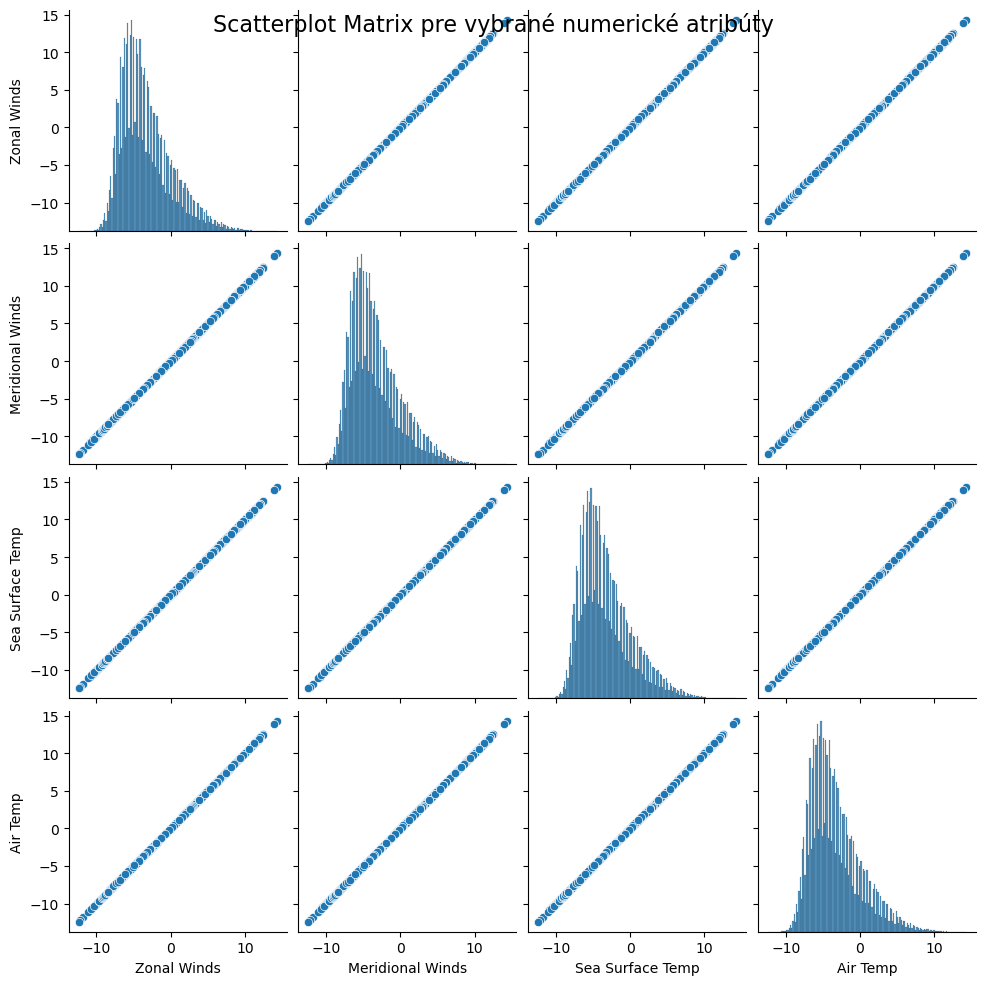

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
elnino_1 = df.dropna()
print(elnino_1.columns)

# Vyberieme numerické atribúty, ktoré chceme zobraziť v scatterplot matrix
numerical_columns = ['Zonal Winds', 'Meridional Winds', 'Sea Surface Temp', 'Air Temp']

# Vytvorenie scatterplot matrix pre tieto atribúty
sns.pairplot(elnino_1[numerical_columns])

# Titulok pre graf
plt.suptitle('Scatterplot Matrix pre vybrané numerické atribúty', fontsize=16)

# Zobrazenie grafu
plt.show()


---
**Úlohy:**
- Vypíš hodnoty vyjadrujúce silu korelácie medzi numerickými atribútmi v dátach **elnino_1** pomocou **korelačnej matice**.
- Zobraz silu korelácie medzi atribútmi v dátach **elnino_1** pomocou špeciálneho typu grafu (korelogram).

> 💡 *Trochu teórie:*  
> - **Korelačná matica** obsahuje hodnoty korelačných koeficientov medzi všetkými pármi numerických atribútov.  
>   - Hodnota blízka 1 znamená silnú pozitívnu koreláciu. (Napríklad čím sa budeš viac učiť tým viac bodov získaš zo skúšky :D )  
>   - Hodnota blízka -1 znamená silnú negatívnu koreláciu. 
>   - Hodnota blízka 0 znamená, že medzi atribútmi nie je lineárna závislosť.  
> - **Korelogram** je grafická reprezentácia korelačnej matice, kde farby znázorňujú silu a smer korelácie.  


                  Observation      Year     Month       Day      Date  \
Observation          1.000000  0.313520 -0.012047  0.000161  0.313760   
Year                 0.313520  1.000000 -0.117527 -0.008029  0.999948   
Month               -0.012047 -0.117527  1.000000  0.012353 -0.107364   
Day                  0.000161 -0.008029  0.012353  1.000000 -0.007650   
Date                 0.313760  0.999948 -0.107364 -0.007650  1.000000   
Latitude            -0.031582 -0.021838  0.003943 -0.000809 -0.021823   
Longitude           -0.043802 -0.061783 -0.005210 -0.002049 -0.061909   
Zonal Winds          0.006978  0.030393  0.052563  0.006574  0.030971   
Meridional Winds     0.006978  0.030393  0.052563  0.006574  0.030971   
Humidity             0.006978  0.030393  0.052563  0.006574  0.030971   
Air Temp             0.006978  0.030393  0.052563  0.006574  0.030971   
Sea Surface Temp     0.006978  0.030393  0.052563  0.006574  0.030971   

                  Latitude  Longitude  Zonal Winds

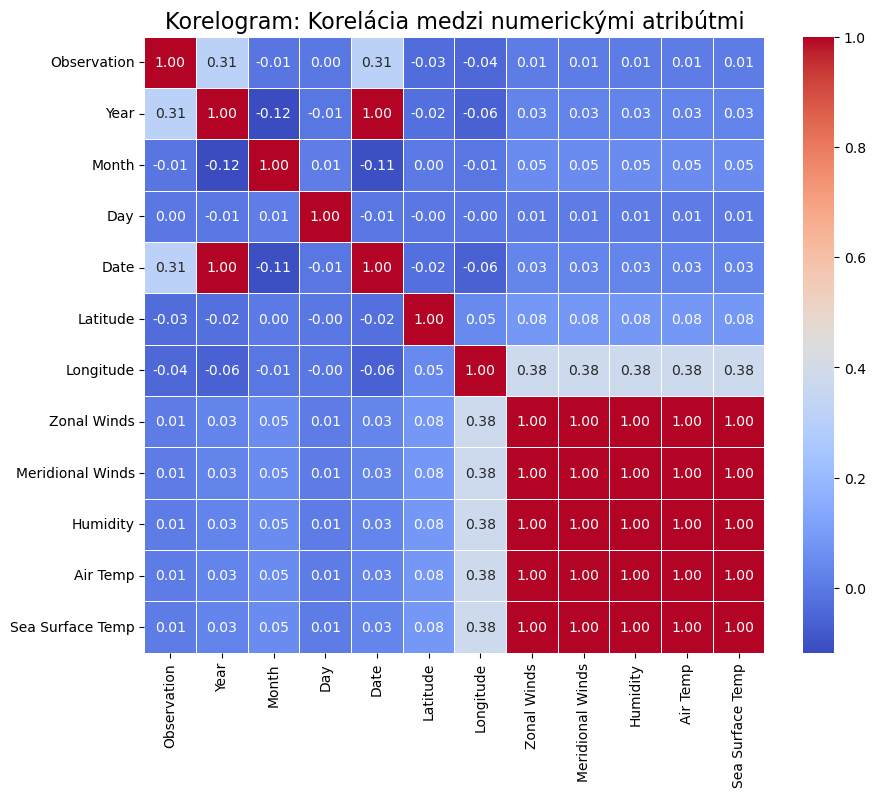

In [121]:
#TVOJ KOD

# Vypočítame korelačnú maticu pre numerické atribúty v 'elnino_1'
correlation_matrix = elnino_1.corr()

# Vypíšeme korelačnú maticu
print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

# Vytvoríme korelogram (heatmap) pre korelačnú maticu
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)

# Titulok pre graf
plt.title('Korelogram: Korelácia medzi numerickými atribútmi', fontsize=16)

# Zobrazenie grafu
plt.show()


---
### Vytvorenie nových atribútov 
**Úlohy:**

- Vytvor v dátach **elnino_1** nové atribúty:  
  - **zon_winds_1**: odvodené z atribútu **Zonal Winds**  
    - hodnota **"West"**, ak je pôvodná hodnota záporná  
    - hodnota **"East"**, ak je pôvodná hodnota kladná  
  - **mer_winds_1**: odvodené z atribútu **Meridional Winds**  
    - hodnota **"South"**, ak je pôvodná hodnota záporná  
    - hodnota **"North"**, ak je pôvodná hodnota kladná  

- **Doplňujúce info k predošlému kroku nájdeš tu:** [El Nino Attribute Information](https://archive.ics.uci.edu/ml/datasets/El+Nino)  

- Uprav dátový typ nových atribútov na **kategoriálny (category)**:  v Pythone použite `astype('category')`  

- Usporiadaj stĺpce v **elnino_1** tak, aby:  
  - **zon_winds_1** nasledoval pred **Zonal Winds**  
  - **mer_winds_1** nasledoval pred **Meridional Winds**  

- Vypíš informácie o dátach pomocou `info()`.  


In [133]:
#TVOJ KOD

import numpy as np

# Vytvorenie nového atribútu 'zon_winds_1' na základe 'Zonal Winds'
df['zon_winds_1'] = np.where(df['Zonal Winds'] < 0, 'West', 'East')

# Vytvorenie nového atribútu 'mer_winds_1' na základe 'Meridional Winds'
df['mer_winds_1'] = np.where(df['Meridional Winds'] < 0, 'South', 'North')

# Skontrolujeme prvých pár riadkov, aby sme sa uistili, že nové atribúty boli pridané
print(df[['Zonal Winds', 'zon_winds_1', 'Meridional Winds', 'mer_winds_1']].head())


   Zonal Winds zon_winds_1  Meridional Winds mer_winds_1
0         -6.8        West              -6.8       South
1         -4.9        West              -4.9       South
2         -4.5        West              -4.5       South
3         -3.8        West              -3.8       South
4         -4.2        West              -4.2       South


---
## Úloha 5: Normalizácia a diskretizácia atribútov
- Pre nasledujúce úlohy môžete použiť dostupné knižnice:  
  - **V Pythone:** `sklearn.preprocessing` (napr. `scale`, `minmax_scale`)
 
> 💡 *Teória:*  
> - **Normalizácia**  
>   - Upravenie hodnôt atribútu do jednotného rozsahu alebo so špecifickými štatistickými vlastnosťami.
>   - **Štandardizácia (Standardization / z-skóre):** hodnoty majú priemer 0 a smerodajnú odchýlku 1. Toto vieme využiť pri algoritmoch citlivých na rozsah hodnôt ako napríklad k-means, PCA
>   - **Min-max normalizácia:** hodnoty sú škálované do zvoleného rozsahu, napr. <-1, 1> alebo <0, 1>.  
>     - Použitie: zachovanie rozloženia dát v jednotnom intervale, napríklad teploty v rôznych jednotkách môžeme previesť do rozsahu 0–1, aby sa dali porovnať.  
> - **Diskretizácia**  
>   - Prevedenie spojitých numerických hodnôt na kategórie alebo intervaly.
>   - V rámci diskretizácie máme opäť viacero prístupov a typov diskretizácie, buď majú intervaly rovnakú šírku alebo rovnaký počet záznamov, alebo vieme aj určiť konkrétne hranice a hodnoty sa zaradia podľa nich.   
>   - Použitie: zjednodušenie dát, kategorizácia hodnôt pre modely alebo vizualizácie. Teplotu môžeme rozdeliť na kategórie "nízka", "stredná", "vysoká".



---
**Úlohy: Normalizácia**
- Normalizuj atribút **Relative Humidity (Relatívna vlhkosť)** pomocou **štandardizácie** (mean=0, std=1).  
- Normalizuj atribút **Air Temperature (Teplota vzduchu)** pomocou **min-max normalizácie** na rozsah <-1,1>.  

> 💡 *Tipy:*  
> - v Pythone existujú vhodné funkcie v sklearn.preprocessing ako napríklad scale a minmax_scale, prípadne sami implementujte vhodný vzorec výpočtu, alebo použite iné dostupné knižnice 


In [132]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Krok 1: Štandardizácia pre 'Relative Humidity'
scaler = StandardScaler()
df['Relative Humidity'] = scaler.fit_transform(df[['Humidity']])

# Krok 2: Min-max normalizácia pre 'Air Temperature' na rozsah <-1, 1>
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
df['Air Temp'] = min_max_scaler.fit_transform(df[['Air Temp']])

# Skontrolujeme prvých pár riadkov, aby sme videli normalizované hodnoty
print(df[['Humidity', 'Relative Humidity', 'Air Temp']].head())


   Humidity  Relative Humidity  Air Temp
0      -6.8          -1.036090 -0.580524
1      -4.9          -0.472873 -0.438202
2      -4.5          -0.354301 -0.408240
3      -3.8          -0.146800 -0.355805
4      -4.2          -0.265372 -0.385768


---
**Úlohy: Ekvidištančná diskretizácia**
- Vytvor nový atribút v dátach **elnino_1** s názvom **s_s_temp_1**, kde hodnoty atribútu **s_s_temp** budú rozdelené do **4 rovnako veľkých intervalov**.  
- Vypíš hranice intervalov a početnosť záznamov v každom intervale.  


In [135]:
import pandas as pd

# Predpokladáme, že 'Sea Surface Temp' obsahuje niektoré neplatné hodnoty
# Preveďte hodnoty stĺpca 'Sea Surface Temp' na číselné hodnoty a nahradte nečíselné hodnoty NaN
elnino_1['Sea Surface Temp'] = pd.to_numeric(elnino_1['Sea Surface Temp'], errors='coerce')

# Vytvorenie nového atribútu 's_s_temp_1' s 4 rovnakými intervalmi pre 'Sea Surface Temp'
elnino_1['s_s_temp_1'], bins = pd.cut(elnino_1['Sea Surface Temp'], bins=4, retbins=True)

# Vypíšeme hranice intervalov
print("Hranice intervalov:", bins)

# Vypíšeme početnosť záznamov v každom intervale
print("\nPočetnosť záznamov v každom intervale:")
print(elnino_1['s_s_temp_1'].value_counts())


Hranice intervalov: [17.33609 20.8275  24.305   27.7825  31.26   ]

Početnosť záznamov v každom intervale:
s_s_temp_1
(27.783, 31.26]     96876
(24.305, 27.783]    51154
(20.828, 24.305]    11914
(17.336, 20.828]     1129
Name: count, dtype: int64


---
**Úlohy: Diskretizácia - Intervaly s pevnými hranicami**
- Vytvor nový atribút v dátach **elnino_1** s názvom **s_s_temp_2**, kde hodnoty atribútu **s_s_temp** budú rozdelené do **3 intervalov**, teda budú vyjadrené triedou od 1,2,3 podľa hraníc **18, 24, 28, 32**.  
- Priraď záznamy do tried **1, 2, 3** a vypíšte početnosť záznamov v každej triede.


In [142]:
#TVOJ KOD 
import pandas as pd

# Definovanie pevných hraníc pre intervaly
bins = [18, 24, 28, 32]

# Priradenie záznamov do tried 1, 2, 3 podľa definovaných hraníc
elnino_1['s_s_temp_2'] = pd.cut(elnino_1['Sea Surface Temp'], bins=bins, labels=[1, 2, 3], right=True)

# Vypíšeme početnosť záznamov v každej triede
print("Početnosť záznamov v každej triede:")
print(elnino_1['s_s_temp_2'].value_counts())


Početnosť záznamov v každej triede:
s_s_temp_2
3    89730
2    77074
1    11273
Name: count, dtype: int64


---
**Úlohy: Ekvifrekvenčná diskretizácia**
- Vytvor nový atribút v dátach **elnino_1** s názvom **s_s_temp_3**, kde hodnoty atribútu **s_s_temp** budú rozdelené do **5 intervalov s rovnakou početnosťou** (ekvifrekvenčná diskretizácia).  
- Vypíš početnosti záznamov v jednotlivých intervaloch.  



In [149]:
import pandas as pd

# Vytvorenie nového atribútu 's_s_temp_3' s 5 intervalmi rovnaké početnosti pre 'Sea Surface Temp'
elnino_1['s_s_temp_3'], bins = pd.qcut(elnino_1['Sea Surface Temp'], q=5, labels=[1, 2, 3, 4, 5], retbins=True)

# Vypíšeme hranice intervalov
print("Hranice intervalov:", bins)

# Vypíšeme početnosť záznamov v každom intervale
print("\nPočetnosť záznamov v jednotlivých intervaloch:")
print(elnino_1['s_s_temp_3'].value_counts())


Hranice intervalov: [17.35       26.49       27.71530884 28.54       29.32       31.26      ]

Početnosť záznamov v jednotlivých intervaloch:
s_s_temp_3
2    43378
4    35800
1    35679
5    35221
3    28002
Name: count, dtype: int64
